In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')


from SALib.sample import saltelli
from SALib.analyze import sobol

import scipy 
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('/Users/casper/Documents/TU Della/Thesis/Finals Docs/Experiments/tables/Final model experiment 2 table-table.csv', skiprows=6 ) 



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000100 entries, 0 to 10000099
Data columns (total 49 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   [run number]                                    int64  
 1   walking-radius                                  int64  
 2   prob-of-violating-rules                         int64  
 3   new-car-treshold                                float64
 4   number-of-cars-company0                         int64  
 5   graduated-sanctions                             bool   
 6   car-sharing-demand                              int64  
 7   number-of-companies                             int64  
 8   collective-choice-arrangement                   bool   
 9   One-company                                     bool   
 10  number-of-cars-company1                         int64  
 11  sanctioning-multiple                            int64  
 12  speed                     

In [4]:
df.rename(columns={'[run number]':'run number','[step]':'tick', '[ satisfied-users ] of company 0':'satisfied company 0',  '[ satisfied-users ] of company 1':'satisfied company 1', '[ satisfied-users ] of company 2': 'satisfied company 2', '[ unsatisfied-users ] of company 0':'unsatisfied company 0',  '[ unsatisfied-users ] of company 1':'unsatisfied company 1', '[ unsatisfied-users ] of company 2': 'unsatisfied company 2', 'count cars with [ ( company-id = company 0 ) ]': 'cars company 0', 'count cars with [ ( company-id = company 1 ) ]': 'cars company 1', 'count cars with [ ( company-id = company 2 ) ]': 'cars company 2'  }, inplace= True) 
df ['total satisfied users'] = df['satisfied company 0'] + df['satisfied company 1'] + df['satisfied company 2'] 
df ['total unsatisfied users'] = df['unsatisfied company 0'] + df['unsatisfied company 1'] + df['unsatisfied company 2'] 
df ['total no parking found'] = df['[ no-parking ] of company 0'] + df['[ no-parking ] of company 1'] + df['[ no-parking ] of company 2']
df ['total profit'] = df[ '[ profit ] of company 0'] + df[ '[ profit ] of company 1'] + df[ '[ profit ] of company 2'] 
df.rename(columns={ '[ no-parking ] of company 0': 'no parking company 0', '[ no-parking ] of company 1': 'no parking company 1', '[ no-parking ] of company 2': 'no parking company 2', '[ company-price ] of company 0': 'price company 0', '[ company-price ] of company 1': 'price company 1', '[ company-price ] of company 2': 'price company 2', '[ profit ] of company 0': 'profit company 0', '[ profit ] of company 1': 'profit company 1', '[ profit ] of company 2': 'profit company 2'}, inplace= True)

In [5]:
df1 = df.drop(columns=['walking-radius', 'prob-of-violating-rules', 'new-car-treshold', 'number-of-cars-company0', 'number-of-cars-company1', 'number-of-cars-company2', 'number-of-companies', 'One-company', 'speed', '[ vote ] of company 0', '[ vote ] of company 1', '[ vote ] of company 2', 'prob-of-sanctioning', '[ company-rules-violated ] of company 0', '[ company-rules-violated ] of company 1', '[ company-rules-violated ] of company 2', '[ company-sanctioned ] of company 0', '[ company-sanctioned ] of company 1', '[ company-sanctioned ] of company 2', 'car-sharing-demand'])

In [6]:
df4 = df1.drop(columns=['run number', 'tick', 'satisfied company 0', 'satisfied company 1', 'satisfied company 2', 'unsatisfied company 0', 'unsatisfied company 1', 'unsatisfied company 2', 'price company 0', 'price company 1', 'price company 2', 'profit company 0', 'profit company 1', 'profit company 2', 'cars company 0', 'cars company 1', 'cars company 2'])

In [8]:
spearman1 = df4.corr(method='spearman')
spearman1

,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,count users,market-price,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
graduated-sanctions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
collective-choice-arrangement,NaN,1.000000,NaN,NaN,0.003260,0.412633,0.907359,-0.003260,0.003260,0.000440,0.002222,-0.000086,0.000875,0.000652,0.000875,0.358055
sanctioning-multiple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
starting-bottom-price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count users,NaN,0.003260,NaN,NaN,1.000000,-0.032638,0.029143,-1.000000,1.000000,0.057207,0.057021,0.057168,0.057111,0.056800,0.057111,0.054874
market-price,NaN,0.412633,NaN,NaN,-0.032638,1.000000,0.608571,0.032638,-0.032638,0.569989,0.572701,0.571288,0.571512,0.571441,0.571510,0.788162
bottom-price,NaN,0.907359,NaN,NaN,0.029143,0.608571,1.000000,-0.029143,0.029143,0.276900,0.278743,0.276355,0.277457,0.277218,0.277456,0.621291
count cars with [ available = true ],NaN,-0.003260,NaN,NaN,-1.000000,0.032638,-0.029143,1.000000,-1.000000,-0.057207,-0.057021,-0.057168,-0.057111,-0.056800,-0.057111,-0.054874
count patches with [ empty = true ],NaN,0.003260,NaN,NaN,1.000000,-0.032638,0.029143,-1.000000,1.000000,0.057207,0.057021,0.057168,0.057111,0.056800,0.057111,0.054874
no parking company 0,NaN,0.000440,NaN,NaN,0.057207,0.569989,0.276900,-0.057207,0.057207,1.000000,0.998792,0.998798,0.999587,0.999565,0.999587,0.883231


In [6]:
spearman = df1.corr(method='spearman')
spearman

,run number,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,satisfied company 1,unsatisfied company 1,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
run number,1.000000e+00,NaN,-8.660687e-01,NaN,NaN,2.232045e-18,-0.001258,-0.001083,-0.001630,-0.001458,...,-0.784812,0.002550,-0.002550,-0.001247,-0.001626,-0.000362,-0.001105,-0.000897,-0.001106,-0.297428
graduated-sanctions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
collective-choice-arrangement,-8.660687e-01,NaN,1.000000e+00,NaN,NaN,5.801226e-16,0.000451,0.000262,0.002223,0.002017,...,0.907359,-0.003260,0.003260,0.000440,0.002222,-0.000086,0.000875,0.000652,0.000875,0.358055
sanctioning-multiple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
starting-bottom-price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tick,2.232045e-18,NaN,5.801226e-16,NaN,NaN,1.000000e+00,0.999539,0.999530,0.999582,0.999573,...,0.276593,-0.058252,0.058252,0.999539,0.999582,0.999577,0.999960,0.999960,0.999960,0.884055
satisfied company 0,-1.257746e-03,NaN,4.510494e-04,NaN,NaN,9.995395e-01,1.000000,0.998938,0.998792,0.999238,...,0.276913,-0.057208,0.057208,1.000000,0.998792,0.998798,0.999587,0.999565,0.999588,0.883236
unsatisfied company 0,-1.082792e-03,NaN,2.617472e-04,NaN,NaN,9.995299e-01,0.998938,1.000000,0.999324,0.998768,...,0.276711,-0.056847,0.056847,0.998938,0.999324,0.999233,0.999557,0.999578,0.999557,0.883403
satisfied company 1,-1.629700e-03,NaN,2.223210e-03,NaN,NaN,9.995819e-01,0.998792,0.999324,1.000000,0.998939,...,0.278744,-0.057021,0.057021,0.998792,1.000000,0.998877,0.999613,0.999595,0.999613,0.884529
unsatisfied company 1,-1.458437e-03,NaN,2.016795e-03,NaN,NaN,9.995732e-01,0.999238,0.998768,0.998939,1.000000,...,0.278537,-0.056838,0.056838,0.999238,0.998939,0.999398,0.999584,0.999606,0.999584,0.884697


In [7]:
df1.head(5)

,run number,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,satisfied company 1,unsatisfied company 1,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
0,4,False,True,20,10,0,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
1,2,False,True,20,10,0,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
2,3,False,True,20,10,0,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
3,1,False,True,20,10,0,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
4,3,False,True,20,10,1,0,0,0,0,...,9.997,600,489,0,0,0,0,0,0,0.0


In [ ]:
df1.plot.scatter(x='tick',y='market-price',figsize=(15,8))

In [ ]:
df1.plot.scatter(x='tick',y='market-price',c='run number',colormap='plasma',figsize=(20,10))

In [ ]:
df1.plot.scatter(x='tick',y='bottom-price',c='run number',colormap='plasma',figsize=(20,10))

In [ ]:
df1.plot.scatter(x='tick',y='count patches with [ empty = true ]',c='run number',colormap='plasma',figsize=(20,10))

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['total satisfied users'], by=['collective-choice-arrangement'])
 
plt.show()

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['total unsatisfied users'], by=['collective-choice-arrangement'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['total no parking found'], by=['collective-choice-arrangement'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['total profit'], by=['collective-choice-arrangement'])

Text(0, 0.5, 'Profit')

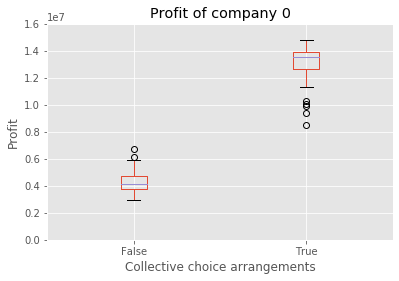

In [12]:
plot = df1.loc[df1['tick'] == 100000].boxplot(column=['profit company 0'], by=['collective-choice-arrangement'])
plt.ylim(0, 16000000 )
plot.get_figure().gca().set_title("Profit of company 0")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("Collective choice arrangements")
plot.get_figure().gca().set_ylabel("Profit")

Text(0, 0.5, 'Profit')

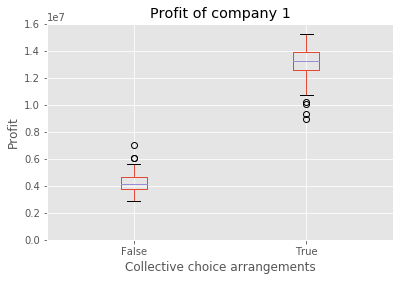

In [13]:
plot = df1.loc[df1['tick'] == 100000].boxplot(column=['profit company 1'], by=['collective-choice-arrangement'])
plt.ylim(0, 16000000 )
plot.get_figure().gca().set_title("Profit of company 1")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("Collective choice arrangements")
plot.get_figure().gca().set_ylabel("Profit")

Text(0, 0.5, 'Profit')

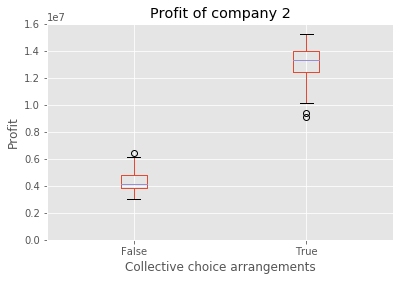

In [14]:
plot = df1.loc[df1['tick'] == 100000].boxplot(column=['profit company 2'], by=['collective-choice-arrangement'])
plt.ylim(0, 16000000 )
plot.get_figure().gca().set_title("Profit of company 2")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("Collective choice arrangements")
plot.get_figure().gca().set_ylabel("Profit")

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['satisfied company 0'], by=['collective-choice-arrangement'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['satisfied company 1'], by=['collective-choice-arrangement'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['satisfied company 2'], by=['collective-choice-arrangement'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['unsatisfied company 0'], by=['collective-choice-arrangement'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['unsatisfied company 1'], by=['collective-choice-arrangement'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['unsatisfied company 2'], by=['collective-choice-arrangement'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['no parking company 0'], by=['collective-choice-arrangement'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['no parking company 1'], by=['collective-choice-arrangement'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['no parking company 2'], by=['collective-choice-arrangement'])

Text(0, 0.5, 'Market price')

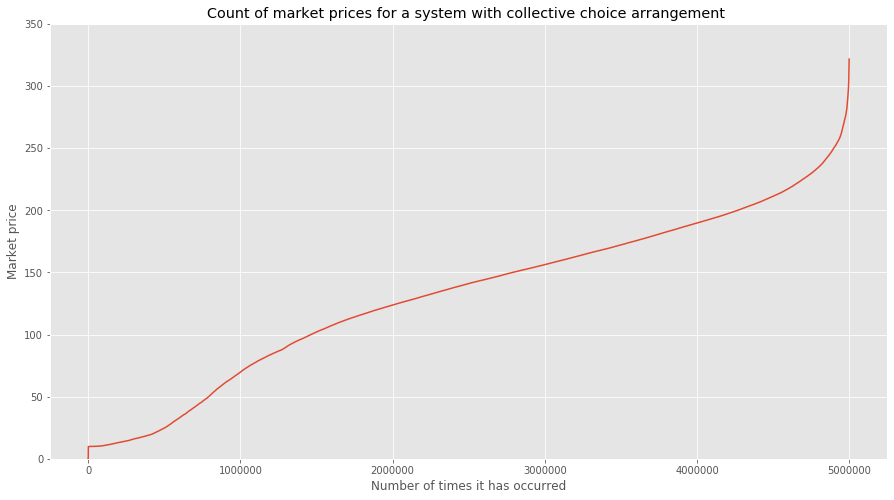

In [10]:
df2 = df1.loc[df1['collective-choice-arrangement'] == True ]
df2.head(5)
plot = df2['market-price'].sort_values().plot(use_index=False,figsize=(15,8))
plt.ylim(0,350 )
plot.get_figure().gca().set_title("Count of market prices for a system with collective choice arrangement ")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("Number of times it has occurred")
plot.get_figure().gca().set_ylabel("Market price")

Text(0, 0.5, 'Market price')

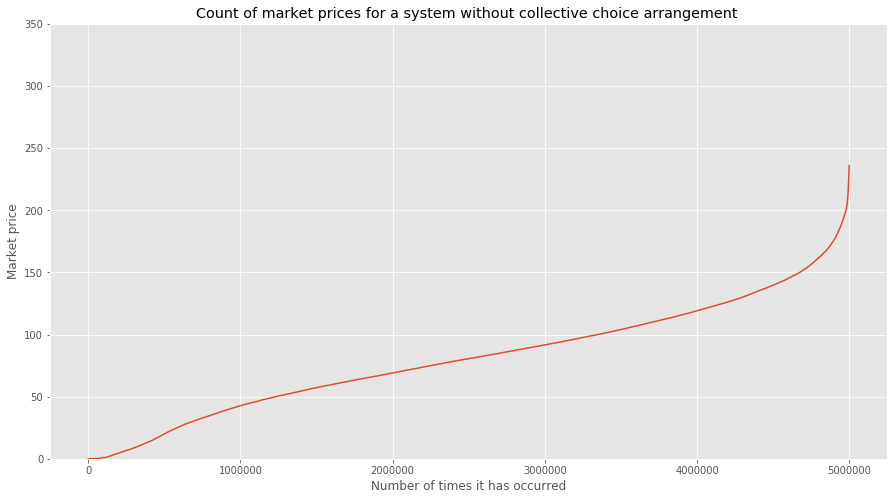

In [11]:
df3 = df1.loc[df1['collective-choice-arrangement'] == False ]
df3.head(5)
plot = df3['market-price'].sort_values().plot(use_index=False,figsize=(15,8))
plt.ylim(0,350 )
plot.get_figure().gca().set_title("Count of market prices for a system without collective choice arrangement ")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("Number of times it has occurred")
plot.get_figure().gca().set_ylabel("Market price")

In [ ]:
df3['market-price'].max()

In [ ]:
df2['market-price'].max()

In [ ]:
df3.agg([np.mean, np.std])

In [ ]:
df3_mean = df3['market-price'].mean()
print(df3_mean)
df3_std = df3['market-price'].std()
print(df3_std)

In [ ]:
df3_mean2 = df3['count patches with [ empty = true ]'].mean()
print(df3_mean2)
df3_std2 = df3['count patches with [ empty = true ]'].std()
print(df3_std2)

In [ ]:
df3_mean1 = df3['bottom-price'].mean()
print(df3_mean1)
df3_std1 = df3['bottom-price'].std()
print(df3_std1)

In [ ]:
df2_mean = df2['market-price'].mean()
print(df2_mean)
df2_std = df2['market-price'].std()
print(df2_std)

In [ ]:
df2_mean1 = df2['bottom-price'].mean()
print(df2_mean1)
df2_std1 = df2['bottom-price'].std()
print(df2_std1)

In [ ]:
df2_mean2 = df2['count patches with [ empty = true ]'].mean()
print(df2_mean2)
df2_std2 = df2['count patches with [ empty = true ]'].std()
print(df2_std2)

In [ ]:
pearsoncorr = df1.corr(method='spearman')
pearsoncorr

In [ ]:
pearsoncorr2 = df2.corr(method='spearman')
pearsoncorr2

In [ ]:
pearsoncorr3 = df3.corr(method='spearman')
pearsoncorr3